In [2]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


PyTorch Logistic Regression Accuracy: 0.8350
Sklearn Logistic Regression Accuracy: 0.8500


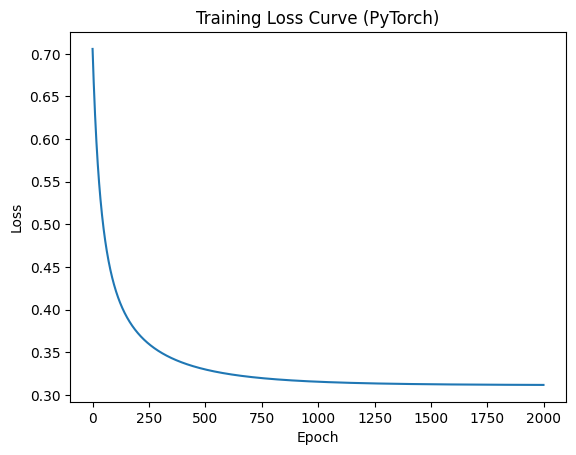

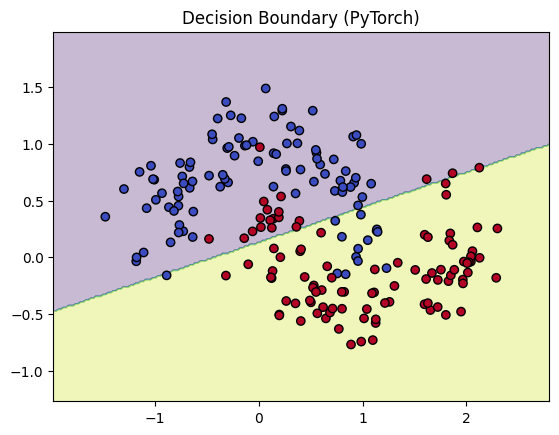

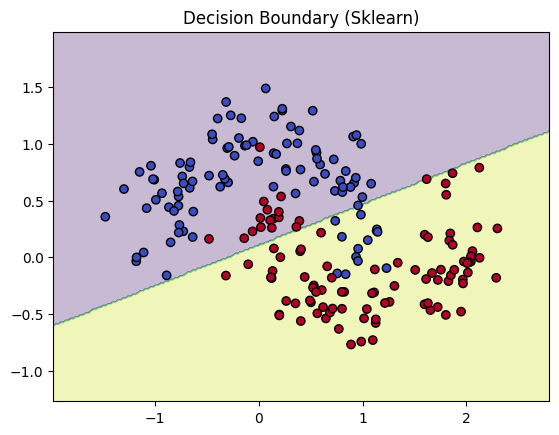

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --------------------------
# 1. Dataset
# --------------------------
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # shape (200,1)

# --------------------------
# 2. Logistic Regression Class in PyTorch
# --------------------------
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.model = None
        self.losses = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.model = nn.Linear(n_features, 1)  # simple linear layer
        criterion = nn.BCEWithLogitsLoss()     # sigmoid + BCE
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            self.losses.append(loss.item())

    def predict_proba(self, X):
        with torch.no_grad():
            logits = self.model(X)
            probs = torch.sigmoid(logits)
        return probs.numpy()

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int).flatten()

# --------------------------
# 3. Train both models
# --------------------------
torch_model = LogisticTorch(lr=0.1, epochs=2000)
torch_model.fit(X_tensor, y_tensor)

# Predictions
y_pred_torch = torch_model.predict(X_tensor)
acc_torch = accuracy_score(y, y_pred_torch)

# sklearn baseline
sk_model = LogisticRegression()
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X)
acc_sk = accuracy_score(y, y_pred_sk)

print(f"PyTorch Logistic Regression Accuracy: {acc_torch:.4f}")
print(f"Sklearn Logistic Regression Accuracy: {acc_sk:.4f}")

# --------------------------
# 4. Plot Loss Curve
# --------------------------
plt.plot(torch_model.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (PyTorch)")
plt.show()

# --------------------------
# 5. Decision Boundary Function
# --------------------------
def plot_decision_boundary(model, X, y, framework="PyTorch"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if framework == "PyTorch":
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        Z = model.predict(grid_tensor)
    else:
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary ({framework})")
    plt.show()

# --------------------------
# 6. Plot Both Decision Boundaries
# --------------------------
plot_decision_boundary(torch_model, X, y, framework="PyTorch")
plot_decision_boundary(sk_model, X, y, framework="Sklearn")
